In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from IPython.display import display
import warnings

warnings.simplefilter('ignore')

In [2]:
!wget -O data.csv https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-09-26 19:33:03--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6,8M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   6,75M  2,28MB/s    in 3,0s    

2021-09-26 19:33:06 (2,28 MB/s) - ‘data.csv’ saved [7077973/7077973]



In [3]:
df = pd.read_csv('data.csv')

df = df[['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

df.reviews_per_month = df.reviews_per_month.fillna(0)

df.isnull().any()

neighbourhood_group               False
room_type                         False
latitude                          False
longitude                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [4]:
display(df.head())

print(df.info())

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB
None


# 1. Most frequent value for neighbourhood_group

In [5]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [6]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

def prep_data(df, target_feature):
    X = df.drop(columns=target_feature).values
    y = df[target_feature].values
    return X, y

X_train, y_train = prep_data(df_train, 'price')
X_val, y_val = prep_data(df_val, 'price')
X_test, y_test = prep_data(df_test, 'price')

print(len(X_train), len(X_val), len(X_test))

29337 9779 9779


# 2. Features with biggest correlation

In [7]:
corr_table = df.corr()

display(corr_table)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


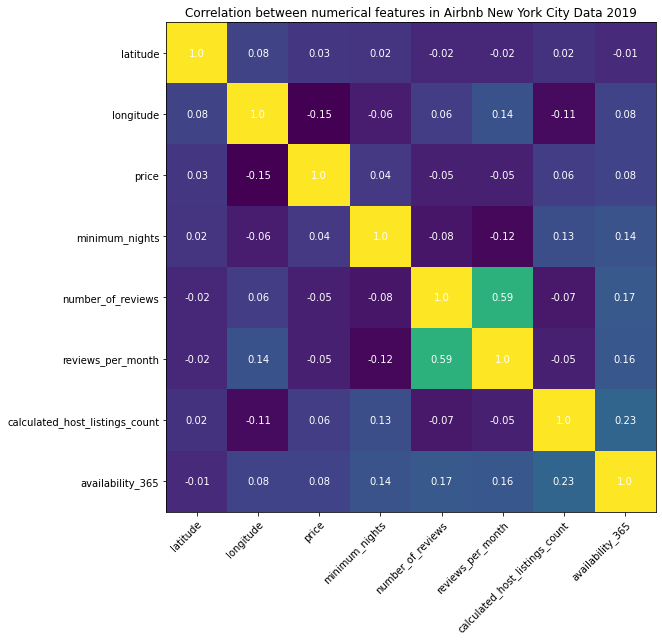

In [8]:
numerical = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
corr_array = np.array(corr_table)
n = len(numerical)

fig, ax = plt.subplots(figsize=(12, 9))

cm = ax.imshow(corr_array)

ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))

ax.set_xticklabels(numerical)
ax.set_yticklabels(numerical)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(n):
    for j in range(n):
        text = ax.text(j, i, round(corr_array[i, j], 2), ha="center", va="center", color="w")

ax.set_title('Correlation between numerical features in Airbnb New York City Data 2019')
plt.show()

# 3. Which variable has the highest mutual information?

In [33]:
above_average = (df_train.price >= 152).astype('int')

categorical = ['neighbourhood_group', 'room_type']

for c in categorical:
    print(c, ":", mutual_info_score(df_train[c], above_average))


neighbourhood_group : 0.04650605348506435
room_type : 0.14322617342090396


# 4. Accuracy of the model